In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras import datasets,layers,models 

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

# loading cifar10 dataset from the tensorflow datasets 

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# checking the shape of the xtrain xtest ytrain and ytest 

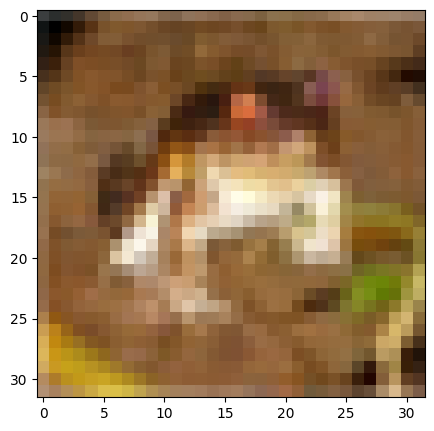

In [8]:
plt.figure(figsize=(5,15))
plt.imshow(x_train[0])

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

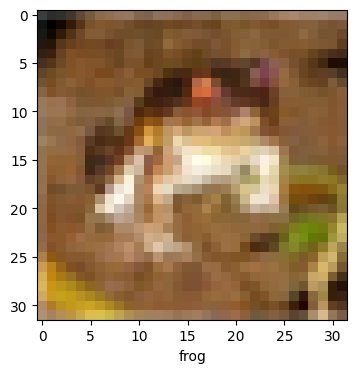

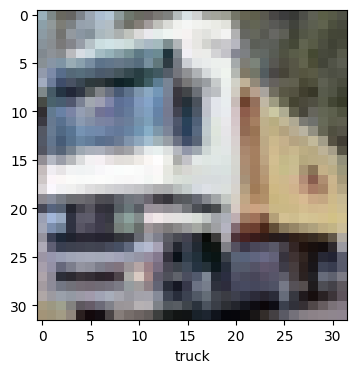

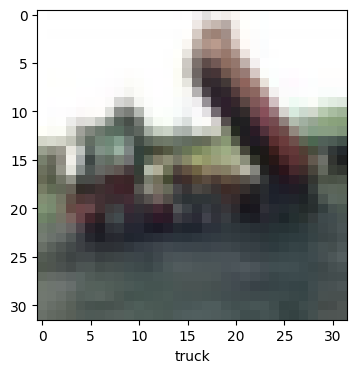

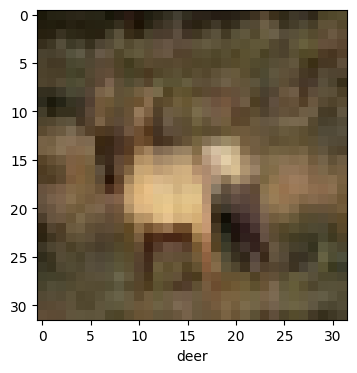

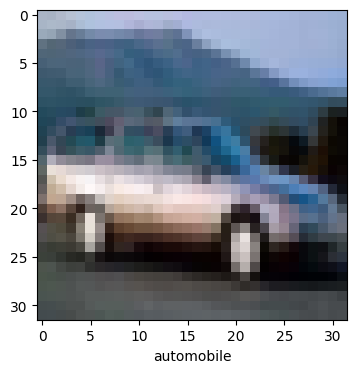

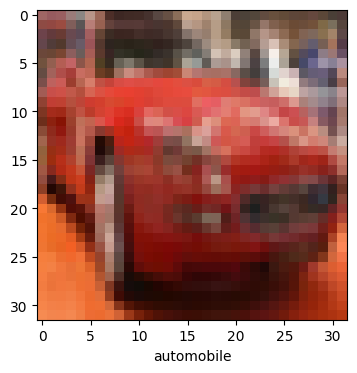

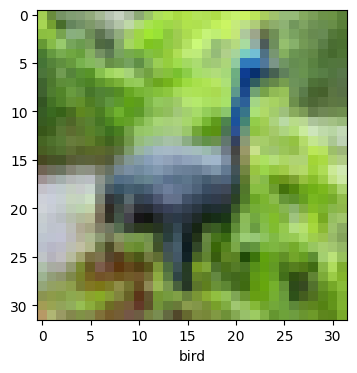

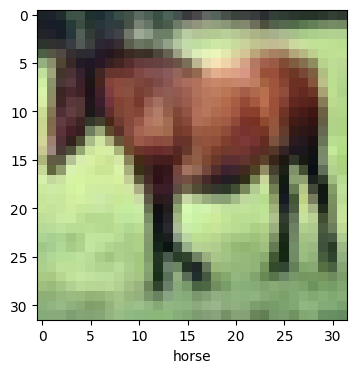

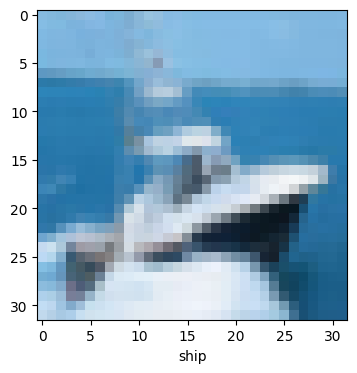

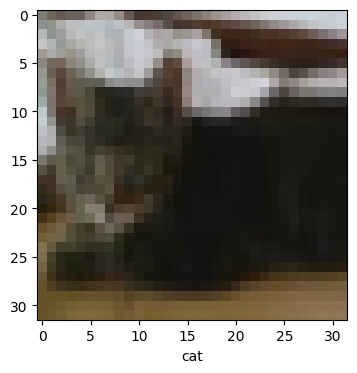

In [10]:
for i in range(0,10):
    plt.figure(figsize=(4,5))
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])

# visualizing the picture using matshow 

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# since we don not required two dimensional array here so we are going to convert to it in the one dimensional array 

In [12]:
y_train=y_train.reshape(-1)

In [13]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [15]:
y_test=y_test.reshape(-1,)

In [16]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

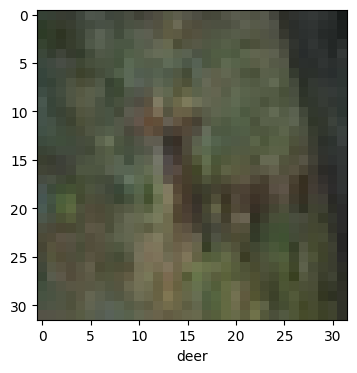

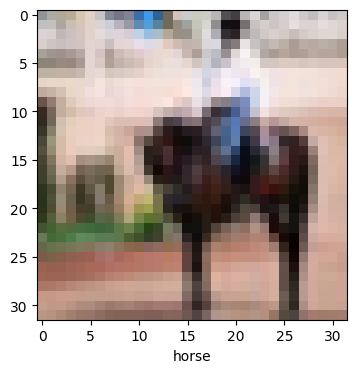

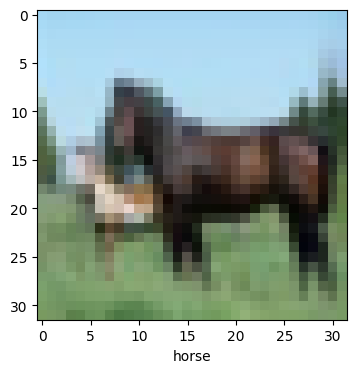

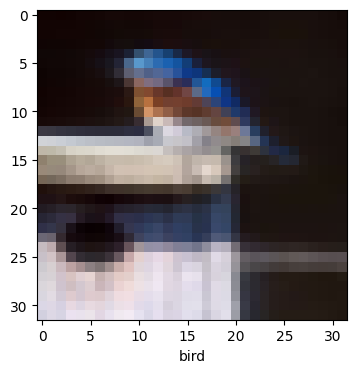

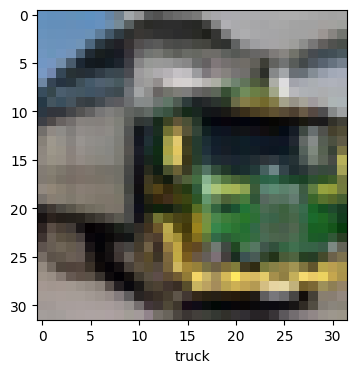

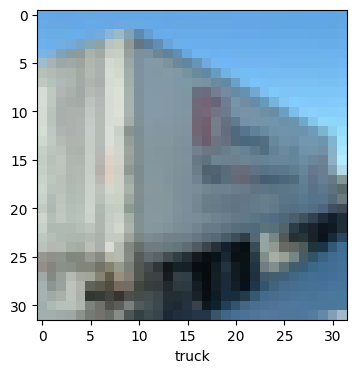

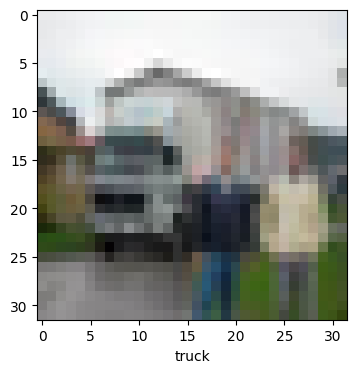

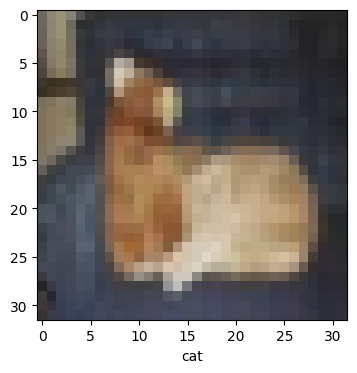

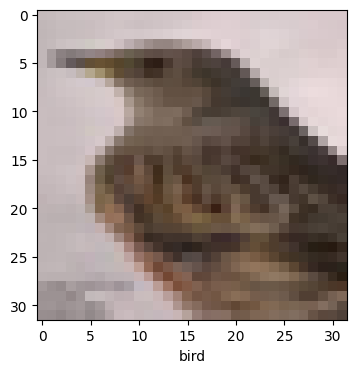

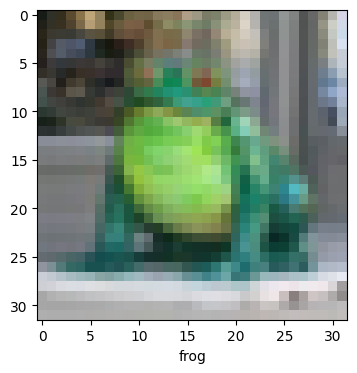

In [17]:
for i in range(10,20):
    plt.figure(figsize=(4,5))
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# since our x_Train is in 3d array and it is rgb for so we have to get the array in scale so that our deep learning model can be trained more properly

In [20]:
x_train=x_train/255

In [21]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
x_test=x_test/255

In [23]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

# we have made both x_train and x_test in the scalabel form in the range of 0 and 1 

# now we will build the simple artifical neural network first here we want to compare this with the artifical neural network and the cnn 

In [24]:
model=keras.Sequential([
    # input layer 
    keras.layers.Flatten(input_shape=(32,32,3),),
    # hidden layer 
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    # output layer
    keras.layers.Dense(10, activation='sigmoid'),
    
])

In [25]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              # whenever we have a categorical data we use the categorical crossentrohy as a loss function 
              metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 502s 291ms/step - loss: 1.8096 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 446s 286ms/step - loss: 1.6137 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 272s 174ms/step - loss: 1.5280 - accuracy: 0.4607
Epoch 4/5
1563/1563 [==============================] - 264s 169ms/step - loss: 1.4612 - accuracy: 0.4826
Epoch 5/5
1563/1563 [==============================] - 277s 177ms/step - loss: 1.4106 - accuracy: 0.5022


In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 47s 46ms/step - loss: 1.4933 - accuracy: 0.4666


[1.4933087825775146, 0.4666000008583069]

In [28]:
from sklearn.metrics import confusion_matrix,classification_report


In [29]:
y_pred=model.predict(x_test)

313/313 [==============================] - 53s 49ms/step


In [30]:
y_predict_classes=[np.argmax(element) for element in y_pred]

In [31]:
print("classification report \n",classification_report(y_test,y_predict_classes))

classification report 
               precision    recall  f1-score   support

           0       0.70      0.38      0.49      1000
           1       0.62      0.52      0.57      1000
           2       0.35      0.41      0.38      1000
           3       0.31      0.47      0.37      1000
           4       0.51      0.31      0.39      1000
           5       0.50      0.25      0.34      1000
           6       0.46      0.62      0.53      1000
           7       0.70      0.39      0.50      1000
           8       0.70      0.51      0.59      1000
           9       0.37      0.79      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



In [32]:
cm=confusion_matrix(y_test,y_predict_classes)


In [33]:
cm

array([[376,  44, 135,  59,  13,   5,  38,  14, 111, 205],
       [  5, 519,  13,  37,   2,   9,  15,  10,  16, 374],
       [ 40,  33, 411, 148,  77,  35, 144,  36,  16,  60],
       [  7,  18,  88, 474,  29,  98, 144,  13,  13, 116],
       [ 26,  13, 204, 108, 312,  26, 191,  35,  14,  71],
       [  6,  12, 122, 331,  45, 254, 106,  37,  18,  69],
       [  2,  13,  80, 131,  57,  22, 624,   8,   9,  54],
       [  8,  22,  82, 147,  60,  43,  59, 391,   4, 184],
       [ 62,  75,  24,  56,  16,  10,  12,   4, 514, 227],
       [  8,  85,   7,  56,   3,   6,  16,  10,  18, 791]], dtype=int64)

In [34]:
import seaborn as sn

Text(50.722222222222214, 0.5, 'true value')

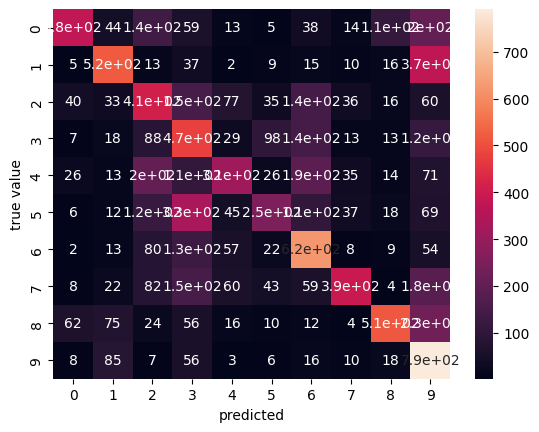

In [39]:
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("true value")

# built a  convolutional neural network to train our image 

In [44]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    # we have created the convolutional layer here where we have given total filter to be 32 for eg eye nose ear 
    # which will taken neural network by himself and kernel size matrix 
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 117s 60ms/step - loss: 1.5035 - accuracy: 0.4577
Epoch 2/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1475 - accuracy: 0.5967
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9955 - accuracy: 0.6552
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9065 - accuracy: 0.6869
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8460 - accuracy: 0.7066
Epoch 6/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7838 - accuracy: 0.7275
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7444 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7036 - accuracy: 0.7557
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6682 - accuracy: 0.7678
Epoch 10/10
1563/1563 [==============================] - 71s 45

#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the feature

In [45]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 19s 16ms/step - loss: 0.9319 - accuracy: 0.6958


[0.9318862557411194, 0.6958000063896179]

In [46]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 10s 17ms/step


In [49]:
y_predict_Class1=[np.argmax(element) for element in y_pred]

In [50]:
print("classification reprort \n" ,classification_report(y_test,y_predict_Class1))

classification reprort 
               precision    recall  f1-score   support

           0       0.77      0.68      0.73      1000
           1       0.85      0.79      0.82      1000
           2       0.61      0.57      0.59      1000
           3       0.53      0.52      0.52      1000
           4       0.58      0.70      0.63      1000
           5       0.68      0.52      0.59      1000
           6       0.64      0.88      0.74      1000
           7       0.78      0.73      0.76      1000
           8       0.76      0.84      0.80      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [51]:
cm1=confusion_matrix(y_test,y_predict_Class1)

Text(50.722222222222214, 0.5, 'predicted value')

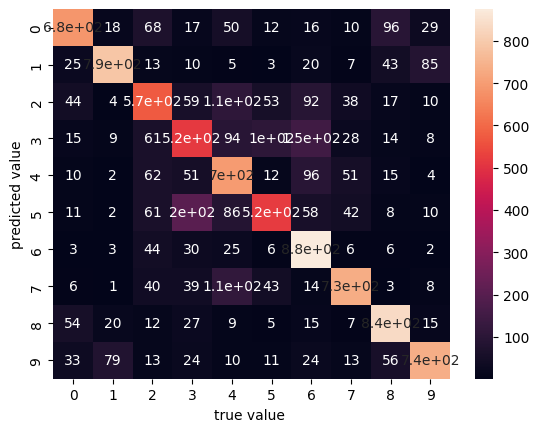

In [54]:
sn.heatmap(cm1,annot=True)
plt.xlabel("true value ")
plt.ylabel("predicted value")